In [29]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [0]:
from keras.datasets import mnist

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [34]:
x_train[1234].shape

(28, 28, 1)

In [0]:
from keras.utils import np_utils

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
x_train = x_train/255
x_test = x_test/255

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(16, (5, 5), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

In [0]:
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))

In [0]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        25664     
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
__________

In [52]:
model.fit(x_train, y_train, batch_size=100, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 95s 2ms/step - loss: 0.1881 - acc: 0.9418
Epoch 2/15
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0513 - acc: 0.9844
Epoch 3/15
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0366 - acc: 0.9883
Epoch 4/15
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0261 - acc: 0.9921
Epoch 5/15
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0204 - acc: 0.9933
Epoch 6/15
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0168 - acc: 0.9948
Epoch 7/15
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0126 - acc: 0.9959
Epoch 8/15
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0118 - acc: 0.9961
Epoch 9/15
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0115 - acc: 0.9966
Epoch 10/15
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0078 - acc: 0.9974

In [53]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 7s 658us/step


In [54]:
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]*100}%')

測試資料的 loss: 0.02908
測試資料的正確率: 99.24%


In [0]:
model.save('myCNNmodel.h5')

In [0]:
del model

In [0]:
from keras.models import load_model
model = load_model('myCNNmodel.h5')

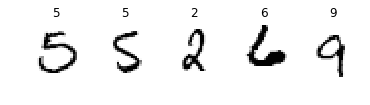

In [58]:
predict = model.predict_classes(x_test)
pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")